# Imports

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import datacompy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load and view our current datasets

In [159]:
df_sy = pd.read_csv("data/semiyearly_data.csv")
df_mon = pd.read_csv("data/monthly_data.csv")
df_baseline = pd.read_csv("data/baseline_data.csv")

In [160]:
conflict = pd.read_csv("data/conflict.csv")
conflict = conflict[["date", "district", "n_conflict_total"]]
conflict = conflict[(conflict.date=='2017-07-01')|(conflict.date=='2018-01-01')|(conflict.date=='2018-07-01')|(conflict.date=='2019-01-01')|
(conflict.date=='2019-07-01')| (conflict.date=='2020-01-01')| (conflict.date=='2020-07-01')|(conflict.date=='2021-01-01')|(conflict.date=='2021-07-01')].sort_values(by="date")

# Explore data

In [161]:
df_sy = df_sy.iloc[:,4:]

In [162]:
df_sy.isnull().sum().sort_values(ascending=False)

AWD/Cholera deaths       644
AWD/cholera cases        353
Price of water           301
MAM_admissions           282
SAM_admissions           282
                        ... 
GAM Prevalence             0
SAM                        0
GAM                        0
Under-Five Population      0
district_encoded           0
Length: 105, dtype: int64

In [163]:
water_price = df_sy[["date","district","Price of water"]]
water_price

,date,district,Price of water
0,2017-07-01,Adan Yabaal,15.0000
1,2017-07-01,Lughaye,4.5000
2,2017-07-01,Buuhoodle,NaN
3,2017-07-01,Luuq,15.0000
4,2017-07-01,Burtinle,85.0000
...,...,...,...
672,2021-07-01,Jariiban,NaN
673,2021-07-01,Caluula,35.0000
674,2021-07-01,Qoryooley,20.1805
675,2021-07-01,Baki,NaN


In [164]:
merged_water_conflict = water_price.merge(conflict, how="outer")
merged_water_conflict = merged_water_conflict.iloc[:-11]
merged_water_conflict.info()
merged_water_conflict.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 676
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              677 non-null    object 
 1   district          677 non-null    object 
 2   Price of water    376 non-null    float64
 3   n_conflict_total  359 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.4+ KB


,Price of water,n_conflict_total
Price of water,1.000000,0.398885
n_conflict_total,0.398885,1.000000


In [165]:
merged_water_conflict.isna().sum()

date                  0
district              0
Price of water      301
n_conflict_total    318
dtype: int64

<AxesSubplot:>

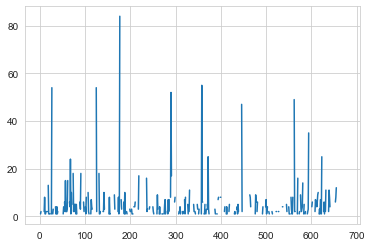

In [166]:
merged_water_conflict["n_conflict_total"].plot()

<AxesSubplot:>

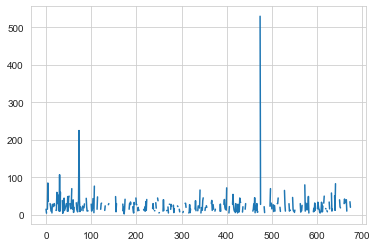

In [167]:
merged_water_conflict["Price of water"].plot()

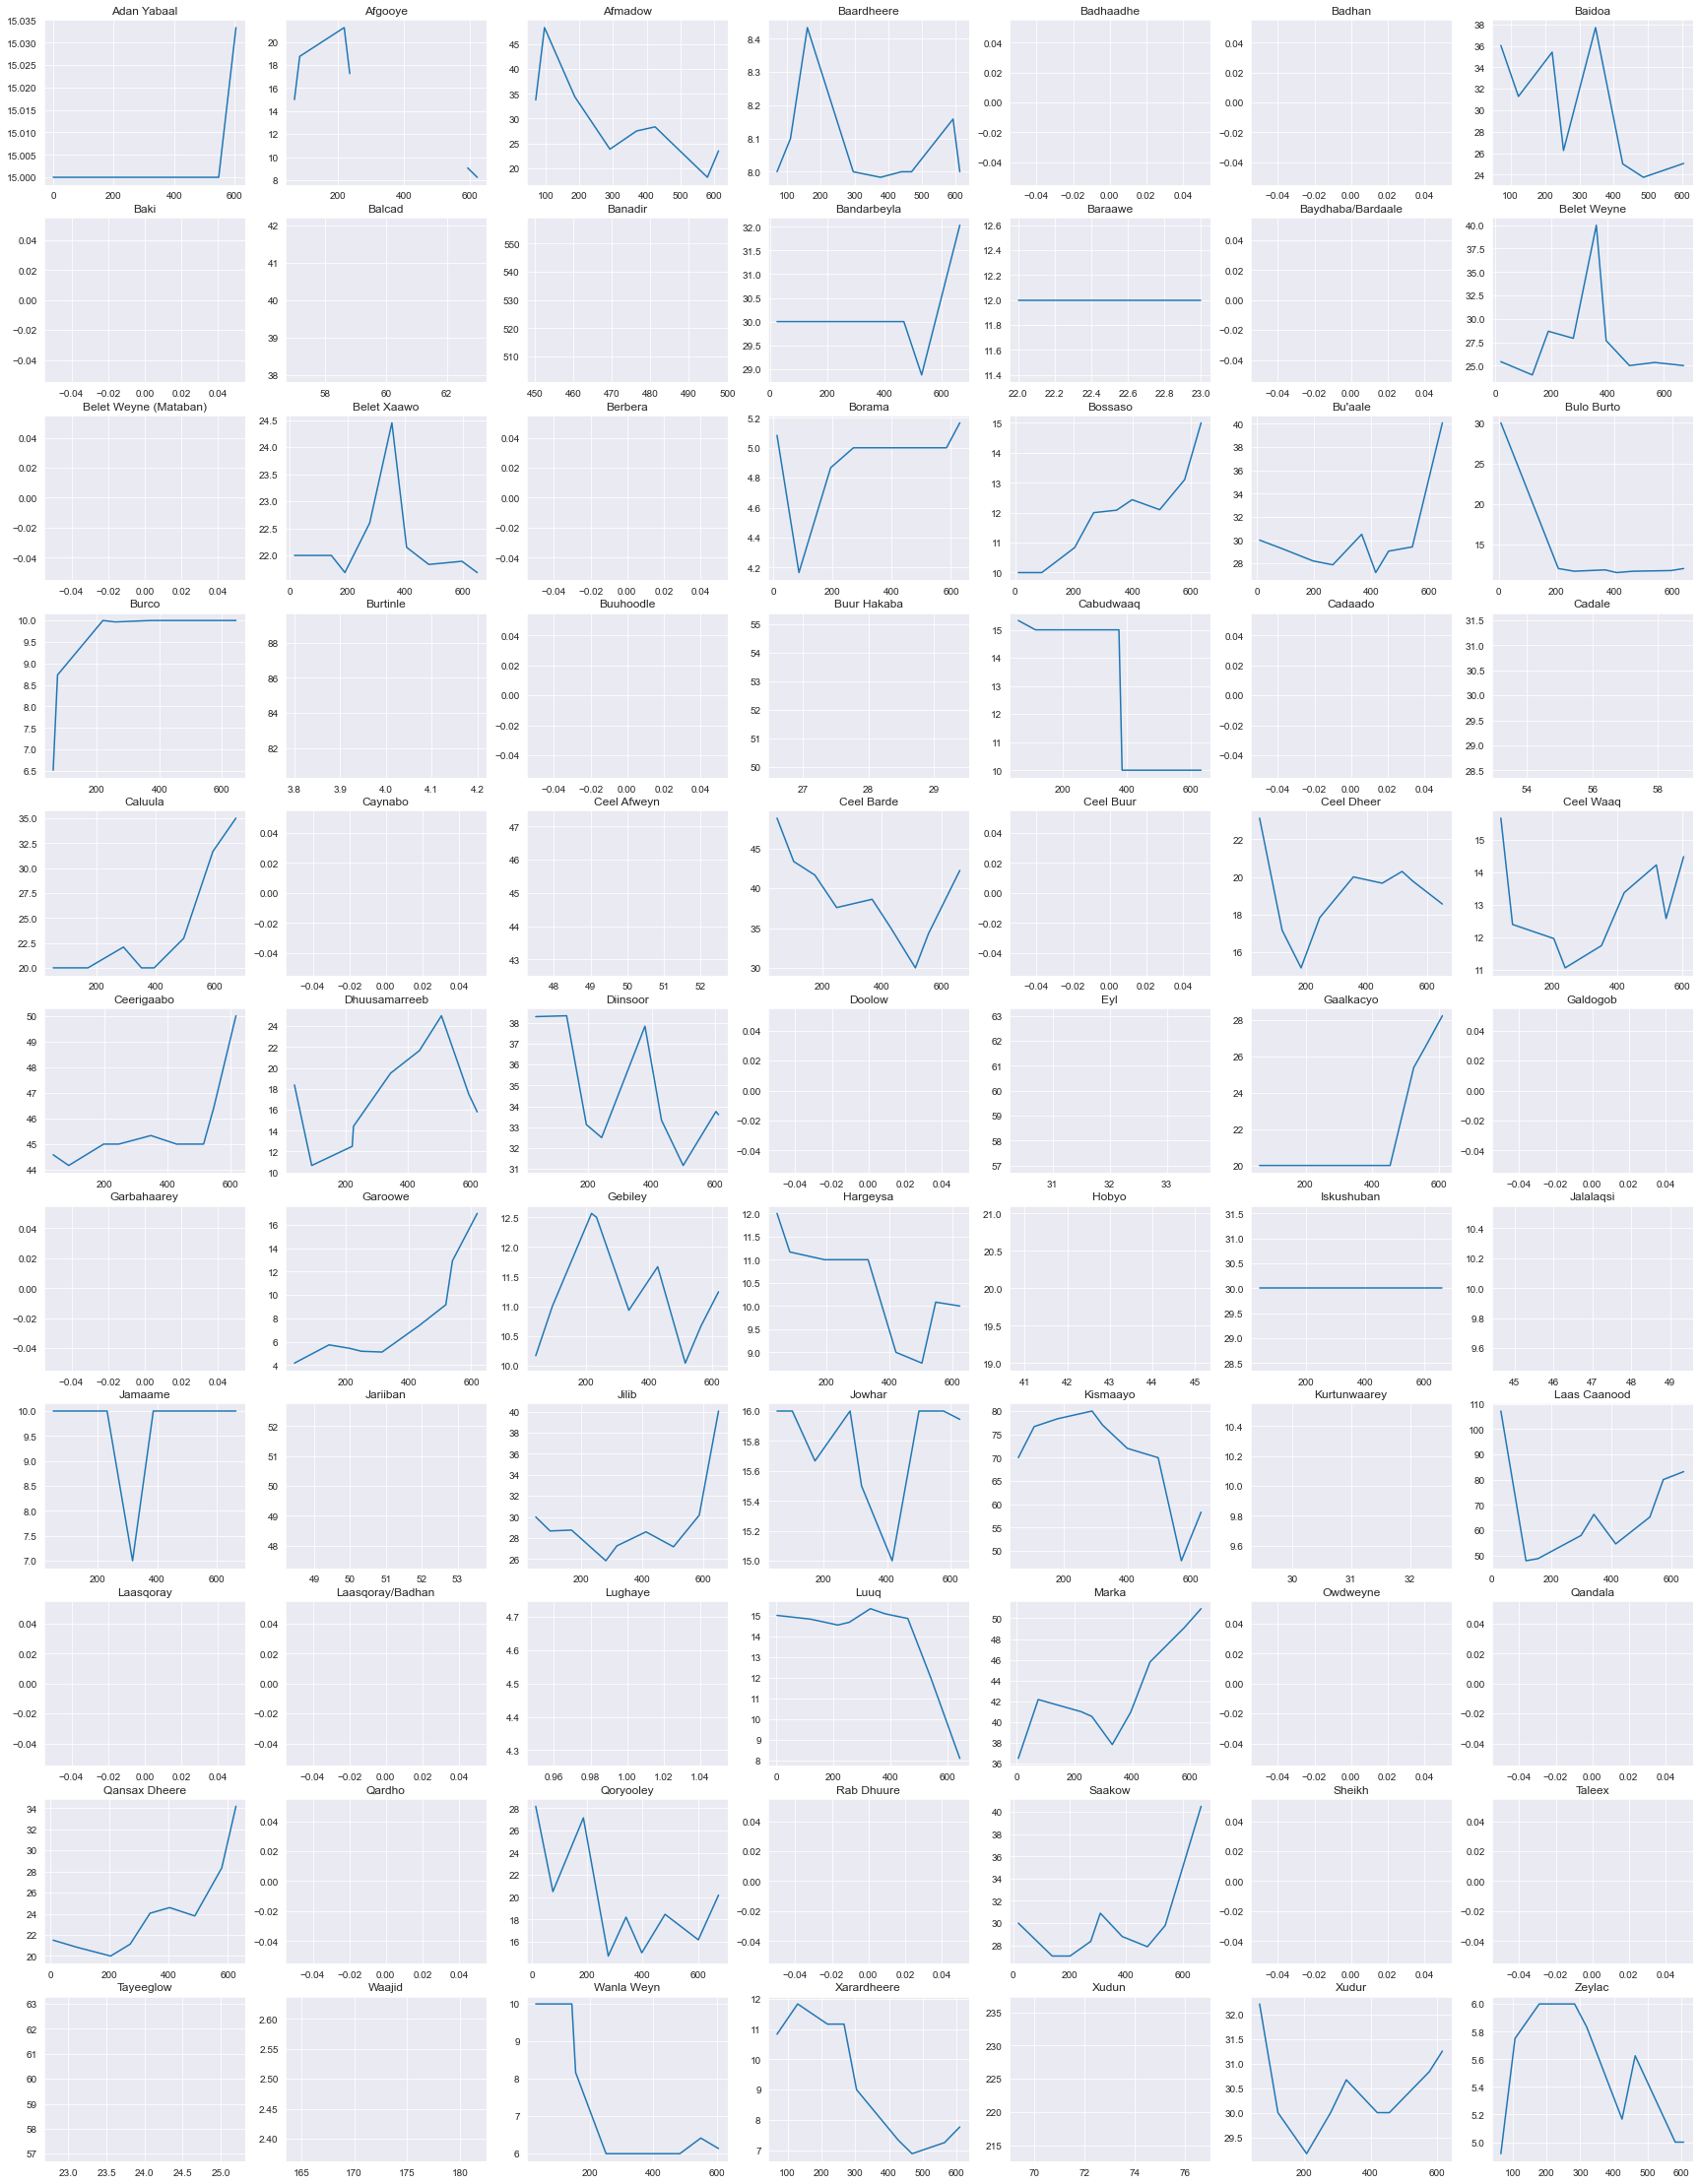

In [233]:

districts = np.sort(df_sy.district_x.unique())
fig, ax = plt.subplots(nrows=11, ncols=7, figsize=(30,40))
axs = ax.ravel()
data = np.arange(0,77)

for ax, d in zip(axs.ravel(), data):
    ax.plot(merged_water_conflict[merged_water_conflict.district == districts[d]]["Price of water"])
    ax.set_title(districts[d])


In [ ]:

districts = np.sort(df_sy.district_x.unique())
fig, ax = plt.subplots(nrows=11, ncols=7, figsize=(30,40))
axs = ax.ravel()
data = np.arange(0,77)

for ax, d in zip(axs.ravel(), data):
    ax.plot(merged_water_conflict[merged_water_conflict.district == districts[d]]["n_conflict_total"])
    ax.set_title(districts[d])


# Figuring out which districts have missing values

In [208]:
districts_missing_water = merged_water_conflict.groupby("district").describe()["Price of water"]["count"].reset_index().sort_values("count")

In [222]:
districts_missing_water.to_csv("missing_water.csv")

In [232]:
districts_missing_water

,district,count
38,Doolow,0.0
62,Qandala,0.0
23,Buuhoodle,0.0
29,Caynabo,0.0
64,Qardho,0.0
...,...,...
44,Gebiley,9.0
45,Hargeysa,9.0
28,Caluula,9.0
76,Zeylac,9.0


In [170]:
merged_water_conflict["water_filled"] = merged_water_conflict["Price of water"].ffill()
merged_water_conflict["conflict_filled"] = merged_water_conflict["n_conflict_total"].ffill()

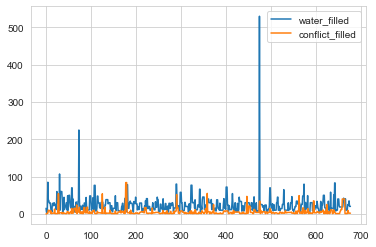

In [171]:
merged_water_conflict.iloc[:2,-1] = [0,0]
merged_water_conflict["water_filled"].plot();
merged_water_conflict["conflict_filled"].plot();
plt.legend();